In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
data = pd.read_csv("C:/Users/haris/Downloads/assignment ds/pca/wine.csv")

In [3]:
# avoid pre_clustered column as per problem statement :
df = data.iloc[:,1:]

In [4]:
df.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.shape

(178, 13)

In [6]:
# apply normalisation :
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
df_norm = norm_func(df)    # (178, 13)

In [7]:
#apply PCA :
pcs = PCA(n_components=13)
pcs_values = pcs.fit_transform(df_norm)
pcs_df = pd.DataFrame(pcs_values)
final_df = pcs_df.iloc[:,0:3]

In [8]:
final_df.head()

,0,1,2
0,-0.706336,-0.253193,0.024093
1,-0.484977,-0.008823,-0.280482
2,-0.521172,-0.189187,0.196217
3,-0.821644,-0.580906,0.081110
4,-0.202546,-0.059467,0.300240


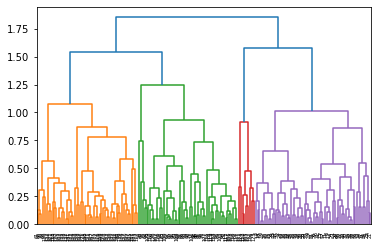

In [9]:
# plot Dendrogram to get optimum number of clusters :
dendogram = sch.dendrogram(sch.linkage(final_df, method="complete"))
plt.show()

In [10]:
# from above dendogram , we have to take 4 clusters which is not same as origianl data :

hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
y_hc = hc.fit_predict(df_norm)
y_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3,
       3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

<ipython-input-11-7aa04b953962>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["h_clustered"] = pd.Series(y_hc)


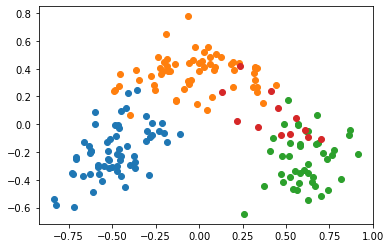

In [11]:
# plot hierarchical clusters :
final_df["h_clustered"] = pd.Series(y_hc)
plt.scatter(final_df[0].loc[final_df.h_clustered==0], final_df[1].loc[final_df.h_clustered==0])
plt.scatter(final_df[0].loc[final_df.h_clustered==1], final_df[1].loc[final_df.h_clustered==1])
plt.scatter(final_df[0].loc[final_df.h_clustered==2], final_df[1].loc[final_df.h_clustered==2])
plt.scatter(final_df[0].loc[final_df.h_clustered==3], final_df[1].loc[final_df.h_clustered==3])
plt.show()

In [ ]:
# there for, we can conclude that numbers of hierarchial clusters obtained after applying PCA is not same as given in raw data